In [3]:
import numpy as np
import matplotlib.pyplot as pl

paltas_directory = '/Users/hollowayp/paltas'
training_directory = '/Users/hollowayp/paltas/notebooks/End_to_End_Tutorial_Files'
model_directory = '/Users/hollowayp/paltas/notebooks/End_to_End_Tutorial_Files/'
import os
os.chdir(paltas_directory)
import sys
sys.path.append(paltas_directory)
x_centre_list = np.linspace(-5,5,101)
for x_centre in x_centre_list:
    x_centre_str = str(x_centre).replace('.','p')+'.py'
    new_config_str = f'/Users/hollowayp/paltas/paltas/Configs/Examples/config_simple_{x_centre_str}'
    print(new_config_str)
    with open('/Users/hollowayp/paltas/paltas/Configs/Examples/config_simple_highres.py','r') as config_orig:
        with open(new_config_str,'w') as config_new:
            for line in config_orig:
                if 'centre_loc = np.nan' not in line:
                    config_new.write(line)
                else:
                    config_new.write('centre_loc = '+str(x_centre)+'\n')
    save_str = training_directory+'/training/1/'+x_centre_str.replace('.py','') 
    !python3 ./paltas/generate.py $new_config_str /$save_str --n 1


/Users/hollowayp/paltas/paltas/Configs/Examples/config_simple_-5p0.py
2023-08-24 18:21:39.223915: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/numba/core/decorators.py:262: NumbaDeprecationWarning: numba.generated_jit is deprecated. Please see the documentation at: https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-generated-jit for more information and advice on a suitable replacement.
  warnings.warn(msg, NumbaDeprecationWarning)
Save folder path: //Users/hollowayp/paltas/notebooks/End_to_End_Tutorial_Files/training/1/-5p0
/Users/hollowayp/paltas/paltas/Sampling/sampler.py:110: UserWarning: Parameter center_x in cross dict specified elsewher

In [10]:
os.getcwd()

'/Users/hollowayp/paltas'

In [14]:
training_directory

'/Users/hollowayp/paltas/notebooks/End_to_End_Tutorial_Files'

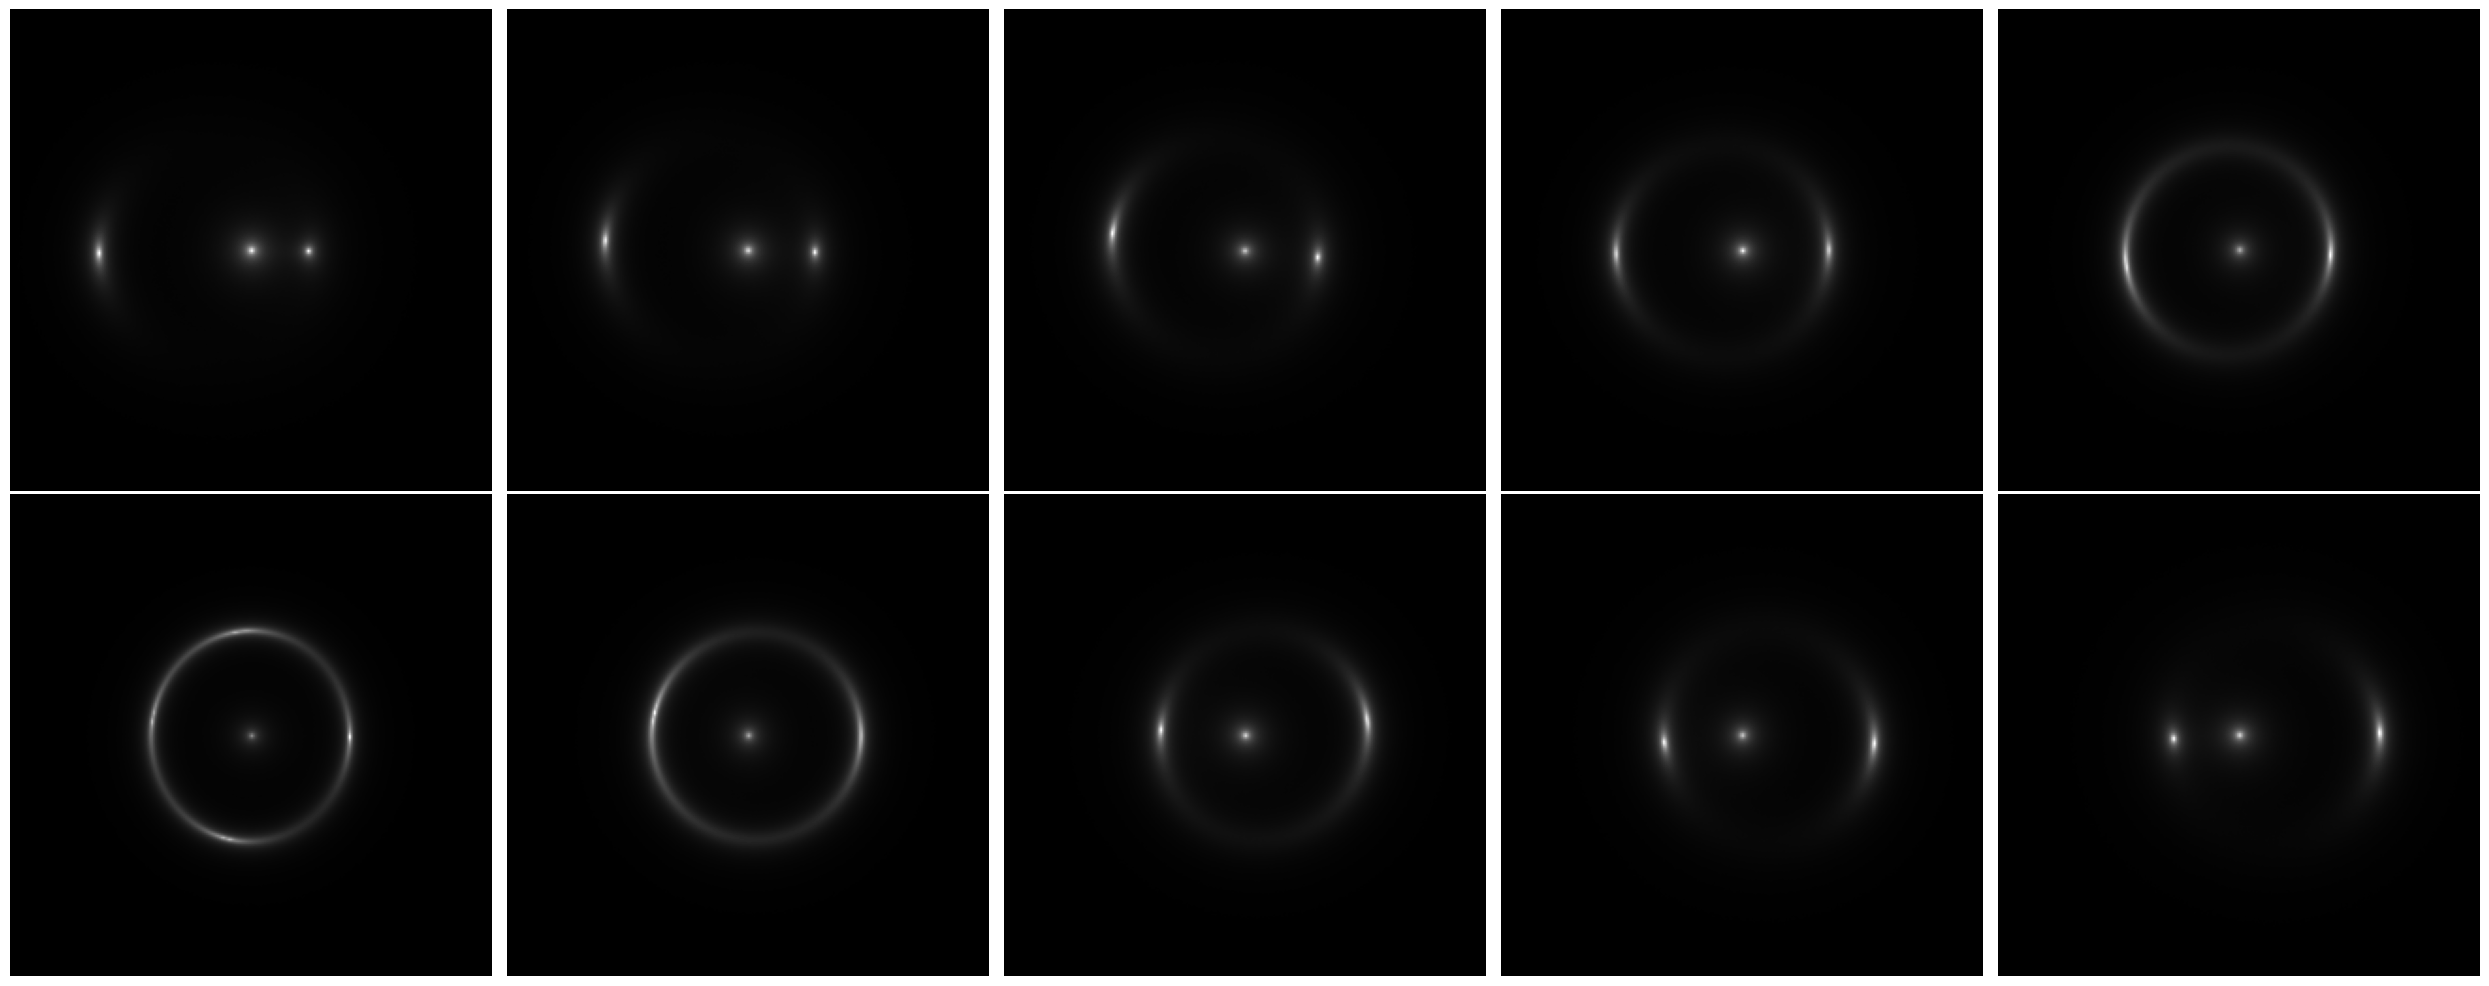

In [16]:
import matplotlib.pyplot as pl
import numpy as np
x_plot = x_centre_list[45:-46]
N_rows = 5
N_cols = np.max([int(np.ceil(len(x_plot)/N_rows)),2])

for n,x_centre in enumerate(x_plot):
    x_centre_str = str(x_centre).replace('.','p')+'.py'
    save_str = training_directory+'/training/1/'+x_centre_str.replace('.py','')+'/image_0000000.npy'
    fig = pl.figure(figsize=(10,10))
    pl.imshow(np.load(f'{save_str}'),cmap='gray')
    pl.axis('off')
    pl.tight_layout()
    pl.savefig(training_directory+f'/lens_gif_{n}',format='png')
    pl.close()

fig,ax = pl.subplots(N_cols,N_rows,figsize=(5*N_rows,5*N_cols))
for n,x_centre in enumerate(x_plot):
    x_centre_str = str(x_centre).replace('.','p')+'.py'
    save_str = training_directory+'/training/1/'+x_centre_str.replace('.py','')+'/image_0000000.npy'
    ax[int(n/N_rows),n%N_rows].imshow(np.load(f'{save_str}'),cmap='gray')
    ax[int(n/N_rows),n%N_rows].set_axis_off()

pl.tight_layout()
pl.show()
